In [18]:
import h5py
import gc
import matplotlib.cm as cm

In [2]:
database = h5py.File('/fpishare/DanieldaSilva/jason_current/current_data_for_idl_v5.h5')

In [3]:
ne   = np.asarray(database['des_n'])
bx   = np.asarray(database['des_bx'])
by   = np.asarray(database['des_by'])
bz   = np.asarray(database['des_bz'])
#gsex = np.asarray(database['mec_gse_x'])
#gsey = np.asarray(database['mec_gse_y'])

class Node(object):
    def set_next(self, n):
        self.next = n
        
cur = Node()
first = cur

for i in range(int(50e6)):
    tmp = Node()
    cur.next  = tmp
    cur = tmp
    
tmp.next = first

del cur
del first
del tmp

gc.collect()

In [4]:
database.keys()

[u'Jmag',
 u'Jpara',
 u'Jperp1',
 u'Jperp2',
 u'Jperp_mag',
 u'Jx',
 u'Jy',
 u'Jz',
 u'des_Pxx',
 u'des_Pxy',
 u'des_Pxz',
 u'des_Pyx',
 u'des_Pyy',
 u'des_Pyz',
 u'des_Pzx',
 u'des_Pzy',
 u'des_Pzz',
 u'des_T',
 u'des_Tpara',
 u'des_Tperp',
 u'des_bx',
 u'des_by',
 u'des_bz',
 u'des_file',
 u'des_n',
 u'des_vx',
 u'des_vy',
 u'des_vz',
 u'dis_Pxy',
 u'dis_Pxz',
 u'dis_Pyx',
 u'dis_Pyy',
 u'dis_Pyz',
 u'dis_Pzx',
 u'dis_Pzy',
 u'dis_Pzz',
 u'dis_T',
 u'dis_Tpara',
 u'dis_Tperp',
 u'dis_bx',
 u'dis_by',
 u'dis_bz',
 u'dis_file',
 u'dis_n',
 u'dis_t',
 u'dis_vx',
 u'dis_vy',
 u'dis_vz',
 u'mec_gse_x',
 u'mec_gse_y',
 u'mec_gse_z',
 u'sc_num',
 u't']

In [5]:
bx.shape

(281500106,)

In [6]:
b = np.sqrt(bx**2 + by**2 + bz**2)

In [7]:
gt_one_indices = np.where(b>1.0)
lt_one_indices = np.where(b<1.0)

In [8]:
print 1.0*gt_one_indices[0].shape[0]/b.shape[0]
print 1.0*lt_one_indices[0].shape[0]/b.shape[0]

0.94914634597
0.0508536540302


In [31]:
lt_one_indices[0].shape

(14315309,)

In [9]:
good_indices = np.logical_and(b>0.0,b<1.0)

In [10]:
print type(good_indices)
print good_indices.shape
print b.shape

<type 'numpy.ndarray'>
(281500106,)
(281500106,)


In [35]:
N        = 10000000
my_slice = slice(0,N)
BB       = b[my_slice]
NN       = ne[my_slice]

(-0.1, 6)

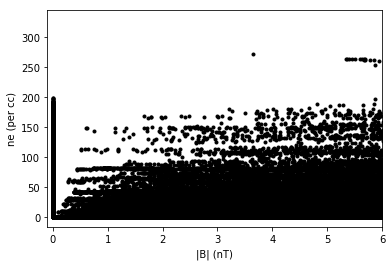

In [36]:
plt.scatter(BB,NN,color='k',marker='.')
plt.xlabel('|B| (nT)')
plt.ylabel('ne (per cc)')
plt.xlim([-0.1,6])

In [41]:
gt_one = np.where(BB>1.0)
lt_one = np.where(BB<1.0)
print lt_one[0].shape[0], gt_one[0].shape[0], BB.shape[0] - lt_one[0].shape[0] - gt_one[0].shape[0]
good_ones = np.logical_and(BB>=0.0,BB<1.0)
print good_ones.shape

565491 9434509 0
(10000000,)


In [ ]:
plt.scatter(b[gt_one_indices],ne[gt_one_indices],color='k',marker='.')
plt.xlabel('|B| (nT)')
plt.ylabel('ne (per cc)')
#plt.xlim([-0.1,2])

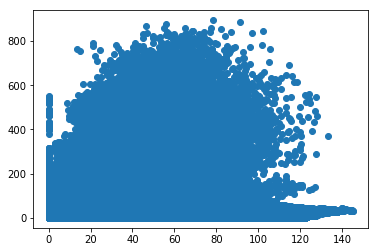

In [8]:
plt.scatter(b,ne)

In [53]:
A = np.array([1,2,3,4,5,6,7,8,9,10])

In [54]:
np.logical_and(A>3,A<8)

array([False, False, False,  True,  True,  True,  True, False, False, False], dtype=bool)

(0, 100)

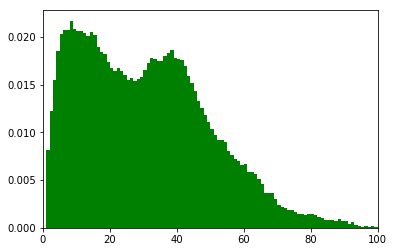

In [12]:
b_n, b_bins, b_patches = plt.hist(b,bins=range(1,101),normed=1,facecolor='g')
plt.xlim([0,100])

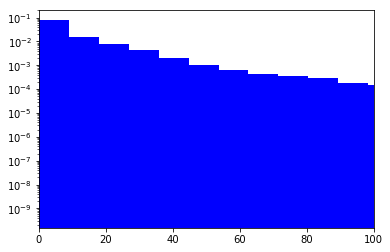

In [13]:
ne_n, ne_bins, ne_patches = plt.hist(ne,100,normed=1,facecolor='b')
plt.xlim([0,100])
plt.yscale('log')

In [25]:
heatmap, xedges, yedges = np.histogram2d(b,ne,bins=100)

(0, 10)

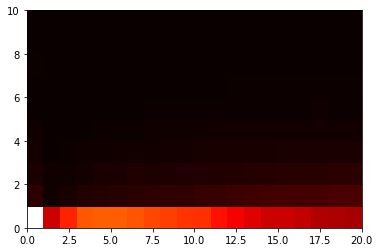

In [28]:
extent = [xedges[0],xedges[-1],yedges[0],yedges[-1]]
plt.pcolormesh(heatmap.T,cmap=cm.hot)#,extent=extent,origin='lower')
plt.xlim([0,20])
plt.ylim([0,10])